<a href="https://colab.research.google.com/github/saiPraneeth1608/saipraneeth_INFO5731_Spring2020/blob/main/In_Class_exercises-10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# In class exercise 10 (20 points in total, 4/16/2021)

The purpose of the exercise is to practice different machine learning algorithms for text clustering
Please downlad the dataset by using the following link.  https://www.kaggle.com/PromptCloudHQ/amazon-reviews-unlocked-mobile-phones
(You can also use different text data which you want)

Apply the listed clustering methods to the dataset:

K means, 
DBSCAN,
Hierarchical clustering. 

You can refer to of the codes from  the follwing link below. 
https://www.kaggle.com/karthik3890/text-clustering 



```
`# This is formatted as code`
```

# New Section

# **Data Reading**

In [ ]:
import pandas as pd
input_data = pd.read_csv("/content/Amazon_Unlocked_Mobile.csv").head(2000)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,1,4) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
print(input_data.shape)

(2000, 6)


In [ ]:
import re
import nltk
import random
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
english_stemmer=nltk.stem.SnowballStemmer('english')
%matplotlib inline

### **Visualization**

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


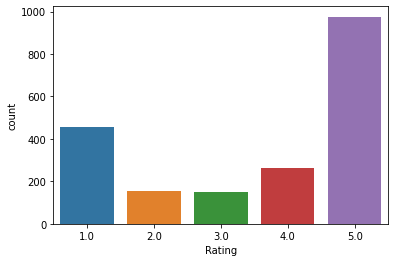

In [ ]:
sns.countplot(input_data.Rating)

### **Positive and Negative Ratings**

In [ ]:
def partition(x):
    if x == 3:
        return 'negative'
    return 'positive'

#changing reviews with score less than 3 to be positive
actualScore = input_data['Rating']
positiveNegative = actualScore.map(partition) 
input_data['Rating'] = positiveNegative
input_data.head(100)

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,positive,I feel so LUCKY to have found this used (phone...,1.0
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,positive,"nice phone, nice up grade from my pantach revu...",0.0
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,positive,Very pleased,0.0
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,positive,It works good but it goes slow sometimes but i...,0.0
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,positive,Great phone to replace my lost phone. The only...,0.0
...,...,...,...,...,...,...
95,"""Nokia Asha 302 Unlocked GSM Phone with 3.2MP ...",Nokia,299.00,positive,very well,0.0
96,"""Nokia Asha 302 Unlocked GSM Phone with 3.2MP ...",Nokia,299.00,positive,Cannot connect to GSM network,0.0
97,"""Nokia Asha 302 Unlocked GSM Phone with 3.2MP ...",Nokia,299.00,positive,"This cell phone exceeded my expectations, it's...",1.0
98,"""Nokia Asha 302 Unlocked GSM Phone with 3.2MP ...",Nokia,299.00,positive,"pros.. it works fine, its easy to use, not too...",1.0


In [ ]:
input_data['Rating'].value_counts()

positive    1850
negative     150
Name: Rating, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


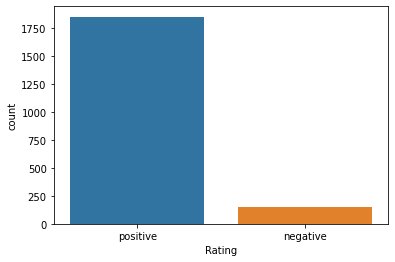

In [ ]:
sns.countplot(input_data.Rating)

# **Data Cleaning**

In [ ]:
# Text Preprocessing
input_data['text_data'] = input_data['Reviews'].apply(lambda x: " ".join(x.lower() for x in str(x).split()))
input_data['text_data'] = input_data['text_data'].str.replace('[^\w\s]','')
from textblob import Word
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
stop = stopwords.words('english')
input_data['text_data'] = input_data['text_data'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
input_data['text_data'] = input_data['text_data'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
input_data['text_data'].head(10)

0    feel lucky found used phone u used hard phone ...
1    nice phone nice grade pantach revue clean set ...
2                                              pleased
3          work good go slow sometimes good phone love
4    great phone replace lost phone thing volume bu...
5    already phone problem know stated used dang st...
6    charging port loose got soldered needed new ba...
7    phone look good wouldnt stay charged buy new b...
8    originally using samsung s2 galaxy sprint want...
9    battery life great responsive touch issue some...
Name: text_data, dtype: object

# **Using K-Means**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vector = TfidfVectorizer()
tfidf = tfidf_vector.fit_transform(input_data['text_data'].values)
tfidf.shape

(2000, 6077)

In [ ]:
data_names= tfidf_vector.get_feature_names()

In [ ]:
from sklearn.cluster import KMeans
model_tf = KMeans(n_clusters = 5, n_jobs = -1,random_state=99)
model_tf.fit(tfidf)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=-1, precompute_distances='auto',
       random_state=99, tol=0.0001, verbose=0)

In [ ]:
from collections import Counter
Counter(model_tf.labels_)

Counter({0: 57, 1: 94, 2: 325, 3: 82, 4: 1442})

In [ ]:
labels = model_tf.labels_
cluster_center=model_tf.cluster_centers_
cluster_center

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [4.76812727e-05, 2.71402406e-04, 4.54709522e-05, ...,
        4.70480076e-04, 3.69755795e-05, 2.42801599e-04]])

In [ ]:
from sklearn import metrics
silhouette_score = metrics.silhouette_score(tfidf, model_tf.labels_, metric='euclidean')
silhouette_score

0.05975773320267129

In [ ]:
print("Top terms per cluster:")
order_centroids = model_tf.cluster_centers_.argsort()[:, ::-1]
for i in range(1,5):
    print("Cluster %d:" % i, end='')
    for ind in order_centroids[i, :5]:
        print(' %s' % data_names[ind], end='')
        print()

Top terms per cluster:
Cluster 1: good
 phone
 product
 price
 cellphone
Cluster 2: phone
 great
 price
 work
 love
Cluster 3: excellent
 product
 recommend
 arrived
 condition
Cluster 4: phone
 work
 good
 love
 like


# **DBSCAN Clustering**

In [ ]:
#DBSCAN
Text_reviews=[]
for i in input_data['text_data']:
  Text_reviews.append(i.split())
import gensim
w2v_model=gensim.models.Word2Vec(Text_reviews, size=100, workers=4)

In [ ]:
import numpy as np
vectors = []
for i in Text_reviews:
    vector = np.zeros(100)
    count = 0
    for word in i:
        try:
            vec = w2v_model.wv[word]
            vector += vec
            count += 1
        except:
            pass
    vector /= count
    vectors.append(vector)  
vectors = np.array(vectors)
vectors = np.nan_to_num(vectors)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in true_divide
  del sys.path[0]


In [ ]:
minPts = 2 * 100

def lower_bound(nums, target): 
    l, r = 0, len(nums) - 1
    while l <= r: # Binary searching
        mid = int(l + (r - l) / 2)
        if nums[mid] >= target:
            r = mid - 1
        else:
            l = mid + 1
    return l

def compute200thnearestneighbour(x, data):
    dists = []
    for val in data:
        dist = np.sum((x - val) **2 ) 
        if(len(dists) == 200 and dists[199] > dist):
            l = int(lower_bound(dists, dist)) #lower bound function to get the right position.
            if l < 200 and l >= 0 and dists[l] > dist:
                dists[l] = dist
        else:
            dists.append(dist)
            dists.sort()
    
    return dists[199] #Dist 199 nothing but distance of 200th nearest neighbour.

In [ ]:
twohundrethneigh = []
for val in vectors[:1500]:
    twohundrethneigh.append( compute200thnearestneighbour(val, vectors[:1500]) )
twohundrethneigh.sort()

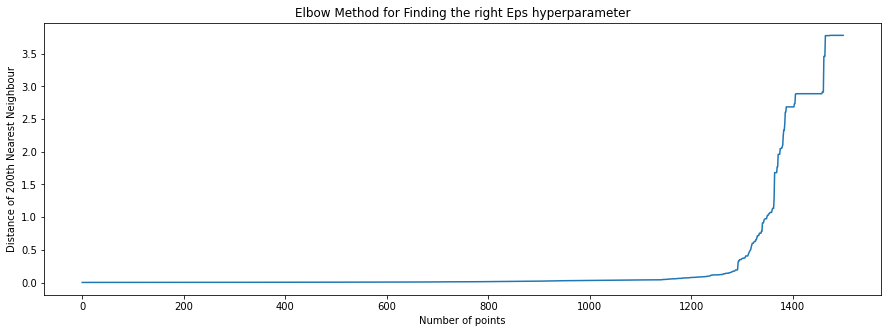

In [ ]:
plt.figure(figsize=(15,5))
plt.title("Elbow Method for Finding the right Eps hyperparameter")
plt.plot([x for x in range(len(twohundrethneigh))], twohundrethneigh)
plt.xlabel("Number of points")
plt.ylabel("Distance of 200th Nearest Neighbour")
plt.show()

In [ ]:
from sklearn.cluster import DBSCAN
model = DBSCAN(eps = 8, min_samples = minPts, n_jobs=-2)
model.fit(vectors)
input_data['AVG-W2V Clus Label'] = model.labels_
input_data.head(2)

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,text_data,AVG-W2V Clus Label
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,positive,I feel so LUCKY to have found this used (phone...,1.0,feel lucky found used phone u used hard phone ...,0
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,positive,"nice phone, nice up grade from my pantach revu...",0.0,nice phone nice grade pantach revue clean set ...,0


# **Hierarchy Clustering**

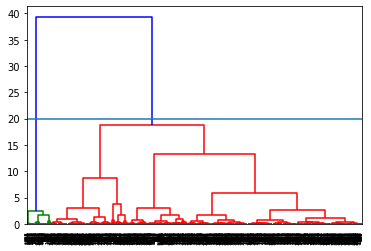

In [ ]:
import scipy
from scipy.cluster import hierarchy
dendro=hierarchy.dendrogram(hierarchy.linkage(vectors,method='ward'))
plt.axhline(y=20)

In [ ]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=7, affinity='euclidean', linkage='ward')  
Agg=cluster.fit_predict(vectors)

In [ ]:
for i in range(3):
    print("2 reviews of assigned to cluster ", i)
    print("-" * 70)
    print(input_data.iloc[input_data.groupby(['AVG-W2V Clus Label']).groups[i][0]]['Reviews'])
    print('\n')
    print(input_data.iloc[input_data.groupby(['AVG-W2V Clus Label']).groups[i][1]]['Reviews'])
    print('\n')
    print("_" * 70)

2 reviews of assigned to cluster  0
----------------------------------------------------------------------
I feel so LUCKY to have found this used (phone to us & not used hard at all), phone on line from someone who upgraded and sold this one. My Son liked his old one that finally fell apart after 2.5+ years and didn't want an upgrade!! Thank you Seller, we really appreciate it & your honesty re: said used phone.I recommend this seller very highly & would but from them again!!


nice phone, nice up grade from my pantach revue. Very clean set up and easy set up. never had an android phone but they are fantastic to say the least. perfect size for surfing and social media. great phone samsung


______________________________________________________________________



In one paragraph, please compare K means, DBSCAN and Hierarchical clustering.

In [ ]:
K- means that the collection of data items is simply divided into clusters and is useful for massive datasets. DBScan is a clustering algorithm based on the density, while hierarchical clustering data is formed automatically into a tree structure (dandogram), and we can choose which trees matter.
In all these K-Means clusters, we can quickly find the optimum values and even train the model.